# Finincial Planner

In [195]:
import os
import pandas as pd
import alpaca_trade_api as tradeapi

from dotenv import load_dotenv
load_dotenv("newkeys.env")

%matplotlib inline

In [196]:
# Load .env environment variables

load_dotenv("newkeys")


True

In [197]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")



In [198]:
# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [199]:
# Set current amount of shares data
shares_data = {
    "shares": [50, 200]
}

# Set the tickers
tickers = ["SPY", "AGG"]

# Create the shares DataFrame
df_shares = pd.DataFrame(shares_data, index=tickers)

# Display shares data
df_shares

,shares
SPY,50
AGG,200


In [200]:
# Collect Investment Data From Alpaca API

In [201]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [202]:
## Collect Investment Data From Alpaca API
## Set the SPY stock and AGG bonds tickers
ticker = ["SPY","AGG"]

## Set timeframe to '1D'
timeframe = "1D"

## Set start and end datetimes of 5 years history.
start_date = pd.Timestamp("2016-03-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-03-01", tz="America/New_York").isoformat()

## Get 5 year's worth of historical data for SPY Stock and AGG Bonds
df_ticker = alpaca.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

## Display sample data
df_ticker.head(10)

AGG                                    SPY  \
                            open   high    low  close     volume   open   
time                                                                      
2017-03-09 00:00:00-05:00 107.32 107.34 107.12 107.15 2894452.00    nan   
2017-03-10 00:00:00-05:00 107.23 107.32 107.16 107.29 1787253.00 237.97   
2017-03-13 00:00:00-04:00 107.21 107.28 107.10 107.11 1488298.00 237.62   
2017-03-14 00:00:00-04:00 107.08 107.24 107.08 107.15 2517060.00 237.20   
2017-03-15 00:00:00-04:00 107.25 107.79 107.20 107.78 2040321.00 237.56   
2017-03-16 00:00:00-04:00 107.68 107.75 107.62 107.67 1890283.00 239.11   
2017-03-17 00:00:00-04:00 107.72 107.91 107.69 107.90 2061802.00 237.75   
2017-03-20 00:00:00-04:00 107.86 108.05 107.84 108.05 1521717.00 237.03   
2017-03-21 00:00:00-04:00 107.93 108.27 107.93 108.27 1885080.00 237.47   
2017-03-22 00:00:00-04:00 108.44 108.54 108.36 108.43 2260513.00 233.77   

                                                             
                            high    low  close       volume  
time                                                         
2017-03-09 00:00:00-05:00    nan    nan    nan          nan  
2017-03-10 00:00:00-05:00 238.02 236.59 237.64  57074557.00  
2017-03-13 00:00:00-04:00 237.86 237.24 237.76  38721556.00  
2017-03-14 00:00:00-04:00 237.24 236.19 236.93  45447851.00  
2017-03-15 00:00:00-04:00 239.44 237.29 238.89  68203425.00  
2017-03-16 00:00:00-04:00 239.20 238.10 238.52  52393139.00  
2017-03-17 00:00:00-04:00 237.97 237.07 237.08  50206841.00  
2017-03-20 00:00:00-04:00 237.36 236.32 236.74  37732815.00  
2017-03-21 00:00:00-04:00 237.61 233.58 233.78 102898817.00  
2017-03-22 00:00:00-04:00 234.61 233.05 234.27  70252351.00

In [203]:
# Create and empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices of SPY Stock and AGG Bonds
df_closing_prices["SPY"] = df_ticker["SPY"]["close"]
df_closing_prices["AGG"] = df_ticker["AGG"]["close"]

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# Compute daily returns
df_daily_returns = df_closing_prices.pct_change().dropna()

# Display sample data
df_daily_returns.head(10)

,SPY,AGG
2017-03-13,0.00,-0.00
2017-03-14,-0.00,0.00
2017-03-15,0.01,0.01
2017-03-16,-0.00,-0.00
2017-03-17,-0.01,0.00
2017-03-20,-0.00,0.00
2017-03-21,-0.01,0.00
2017-03-22,0.00,0.00
2017-03-23,-0.00,0.00
2017-03-24,-0.00,-0.00


In [204]:
df_daily_returns.tail()

,SPY,AGG
2021-02-23,0.00,0.00
2021-02-24,0.01,-0.00
2021-02-25,-0.02,-0.01
2021-02-26,-0.01,0.01
2021-03-01,0.02,-0.00


In [205]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [206]:
# Format current date as ISO format
today = pd.Timestamp("2021-03-31", tz="America/New_York").isoformat()

In [207]:
today

'2021-03-31T00:00:00-04:00'

In [208]:
# Set timeframe to one day ('1D') for the Alpaca API
timeframe = "1D"

In [209]:
# Get current price data for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Display sample data
df_portfolio

AGG                                  SPY       \
                            open   high    low  close   volume   open high   
time                                                                         
2021-03-31 00:00:00-04:00 113.84 113.98 113.71 113.82  5851348 395.34  398   

                                                   
                             low  close    volume  
time                                               
2021-03-31 00:00:00-04:00 395.31 396.26  88555440

In [210]:
## Calculate Current Value of Portfolio

# Fetch the current closing prices from the DataFrame
my_spy_pershare = float(df_portfolio["SPY"]["close"])
my_agg_pershare = float(df_portfolio["AGG"]["close"])

In [211]:
my_spy_pershare

396.26

In [212]:
# Compute the current value in dollars of the stock portfolio
my_spy = my_spy_pershare * df_shares.loc["SPY"]["shares"]
my_agg = my_agg_pershare * df_shares.loc["AGG"]["shares"]


In [213]:
# Print the current value of the stocks portfolio
print(f"The current value of the {df_shares.loc['SPY']['shares']} SPY shares is ${my_spy:0.2f}")
print(f"The current value of the {df_shares.loc['AGG']['shares']} AGG shares is ${my_agg:0.2f}")  

The current value of the 50 SPY shares is $19813.00
The current value of the 200 AGG shares is $22764.00


In [214]:
pd.options.display.float_format = '{:1.2f}'.format

In [215]:
# Total Value of Share Values
total_share_values = my_spy + my_agg
total_share_values

42577.0

In [216]:
# Collect Crypto Prices using Free Crypto API 

In [217]:
import requests
import json
import pandas as pd

In [218]:
# Set current amount of Crypto Asset

crypto_assets = {
    "lots": [1.2, 5.3]
}

# Set the Coins
coins = ["BTC","ETH"]

# Create the shares DataFrame
coin_lots = pd.DataFrame(crypto_assets, index=coins)

# Display shares data
coin_lots

,lots
BTC,1.20
ETH,5.30


In [219]:
pd.options.display.float_format = '{:6.2f}'.format

In [220]:
# Crypto API URl's
crypto_url =  "https://api.alternative.me/v1/ticker/?limit=2&convert=USD"


In [221]:
crypto_url = crypto_url + "?format=json"


In [222]:
requests.get(crypto_url)


<Response [200]>

In [223]:
response_data = requests.get(crypto_url)

In [224]:
# Get content Crypto Data
response_content = response_data.content
print(response_content)

b'[\n\t{\n\t\t"id": "bitcoin",\n\t\t"name": "Bitcoin",\n\t\t"symbol": "BTC",\n\t\t"rank": "1",\n\t\t"price_usd": "57852.0000000000000000",\n\t\t"price_btc": "0",\n\t\t"24h_volume_usd": "54884673888",\n\t\t"market_cap_usd": "1080295618754",\n\t\t"available_supply": "18673275",\n\t\t"total_supply": "18673275",\n\t\t"max_supply": "21000000",\n\t\t"percent_change_1h": "0.6325063850435510",\n\t\t"percent_change_24h": "-2.3783603387441700",\n\t\t"percent_change_7d": "3.6181142018605400",\n\t\t"last_updated": "1617541183"\n\t},\n\t{\n\t\t"id": "ethereum",\n\t\t"name": "Ethereum",\n\t\t"symbol": "ETH",\n\t\t"rank": "2",\n\t\t"price_usd": "2068.1000000000000000",\n\t\t"price_btc": "0",\n\t\t"24h_volume_usd": "34091318322",\n\t\t"market_cap_usd": "238901725555",\n\t\t"available_supply": "115330336",\n\t\t"total_supply": "115330336",\n\t\t"max_supply": "null",\n\t\t"percent_change_1h": "0.9046468625780480",\n\t\t"percent_change_24h": "-1.7089069165733900",\n\t\t"percent_change_7d": "20.6705015874

In [225]:
import json

In [226]:
# Formatting as json
crypto_data = response_data.json()


In [227]:
# Add indents to JSON and output to screen
print(json.dumps(crypto_data,indent=4))



[
    {
        "id": "bitcoin",
        "name": "Bitcoin",
        "symbol": "BTC",
        "rank": "1",
        "price_usd": "57852.0000000000000000",
        "price_btc": "0",
        "24h_volume_usd": "54884673888",
        "market_cap_usd": "1080295618754",
        "available_supply": "18673275",
        "total_supply": "18673275",
        "max_supply": "21000000",
        "percent_change_1h": "0.6325063850435510",
        "percent_change_24h": "-2.3783603387441700",
        "percent_change_7d": "3.6181142018605400",
        "last_updated": "1617541183"
    },
    {
        "id": "ethereum",
        "name": "Ethereum",
        "symbol": "ETH",
        "rank": "2",
        "price_usd": "2068.1000000000000000",
        "price_btc": "0",
        "24h_volume_usd": "34091318322",
        "market_cap_usd": "238901725555",
        "available_supply": "115330336",
        "total_supply": "115330336",
        "max_supply": "null",
        "percent_change_1h": "0.9046468625780480",
        

In [228]:
crypto_data[0]["price_usd"]

'57852.0000000000000000'

In [229]:
pd.options.display.float_format = '{:0.2f}'.format

In [230]:
# Select BTC Current Price
my_btc = crypto_data[0]["price_usd"]
my_eth = crypto_data[1]["price_usd"]

print("BTC Price Today $: " + my_btc)
print("ETH Price Today $: " + my_eth)

BTC Price Today $: 57852.0000000000000000
ETH Price Today $: 2068.1000000000000000


In [231]:
print(float(my_btc))


57852.0


In [232]:
print(float(my_eth))


2068.1


In [233]:
coin_lots

,lots
BTC,1.20
ETH,5.30


In [234]:
total_btc_value = float(my_btc) * coin_lots.loc["BTC"]
total_eth_value = float(my_eth) * coin_lots.loc["ETH"]


print((total_btc_value)+(total_eth_value))

lots   80383.33
dtype: float64


In [235]:
# Portfolio Value of Crypocurrencies 
total_crypto_value = float(total_btc_value + total_eth_value)

total_crypto_value


80383.32999999999

# Saving and Health Analysis

In [236]:
# Set monthly household income
monthly_income = 12000


In [237]:
# Create Savings Database

df_savings = {
    "Amount": [total_crypto_value, total_share_values]
}

# Set the Coins
Types = ["Crypto","Shares"]

# Create the shares DataFrame
savings = pd.DataFrame(df_savings, index=Types)

# Display shares data
savings

,Amount
Crypto,80383.33
Shares,42577.00


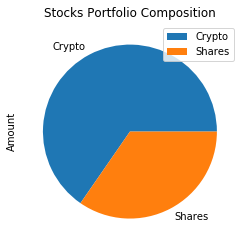

In [238]:
# Plot savings pie chart
savings.plot.pie(y="Amount", title="Stocks Portfolio Composition")


In [239]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
amount_savings = emergency_fund + total_crypto_value + total_share_values

# Validate saving health
print(emergency_fund)
print(amount_savings)

36000
158960.33


In [240]:
emergency_fund = 36000
while amount_savings >  emergency_fund:
    print("Congratulations! You have enough money in your emergency fund")
    break

Congratulations! You have enough money in your emergency fund


# Part 2 - Retirement Planning

## Monte Carlo Simulation

In [241]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-04-03', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-04-03', tz='America/New_York').isoformat()

In [242]:
# Get 5 years' worth of historical data for SPY and AGG
ticker = ["SPY","AGG"]

## Set timeframe to '1D'
timeframe = "1D"

## Set start and end datetimes of 5 years history.
start_date = pd.Timestamp("2016-04-03", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-04-03", tz="America/New_York").isoformat()

## Get 5 year's worth of historical data for SPY Stock and AGG Bonds
df_ticker = alpaca.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

## Display sample data
df_ticker.head(10)

AGG                                    SPY  \
                            open   high    low  close     volume   open   
time                                                                      
2017-04-11 00:00:00-04:00 108.76 108.98 108.75 108.90 2054745.00    nan   
2017-04-12 00:00:00-04:00 108.93 109.20 108.89 109.14 2243678.00 234.74   
2017-04-13 00:00:00-04:00 109.25 109.39 109.13 109.28 2004878.00 233.63   
2017-04-17 00:00:00-04:00 109.30 109.40 109.18 109.22 1432374.00 233.11   
2017-04-18 00:00:00-04:00 109.41 109.70 109.39 109.67 2200401.00 233.71   
2017-04-19 00:00:00-04:00 109.47 109.56 109.39 109.47 1986888.00 234.52   
2017-04-20 00:00:00-04:00 109.31 109.40 109.20 109.30 1738089.00 234.15   
2017-04-21 00:00:00-04:00 109.40 109.49 109.30 109.33 1388470.00 235.25   
2017-04-24 00:00:00-04:00 109.05 109.22 109.00 109.17 1945439.00 237.18   
2017-04-25 00:00:00-04:00 108.99 109.05 108.77 108.81 1717302.00 237.91   

                                                            
                            high    low  close      volume  
time                                                        
2017-04-11 00:00:00-04:00    nan    nan    nan         nan  
2017-04-12 00:00:00-04:00 234.96 233.77 234.10 55338215.00  
2017-04-13 00:00:00-04:00 234.49 232.54 232.54 63216959.00  
2017-04-17 00:00:00-04:00 234.57 232.88 234.57 46820072.00  
2017-04-18 00:00:00-04:00 234.49 233.08 233.86 52786936.00  
2017-04-19 00:00:00-04:00 234.95 233.18 233.47 53760209.00  
2017-04-20 00:00:00-04:00 235.84 233.78 235.30 65462557.00  
2017-04-21 00:00:00-04:00 235.31 234.13 234.59 54056385.00  
2017-04-24 00:00:00-04:00 237.41 236.61 237.12 72965789.00  
2017-04-25 00:00:00-04:00 238.95 237.81 238.53 55736881.00

In [190]:
# Import MC dependancies
from MCForecastTools import MCSimulation

In [191]:
# Print the documentation of the MCSimulation module of the MCForecastTools library
?MCSimulation

Init signature: MCSimulation(portfolio_data, weights='', num_simulation=1000, num_trading_days=252)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number of simulation sampl

In [192]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyear = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.40,.60],
    num_simulation = 1000,
    num_trading_days = 252*30
)

In [193]:
# Printing the simulation input data
MC_thirtyear.portfolio_data.head()

AGG                                               \
                            open   high    low  close     volume daily_return   
time                                                                            
2017-04-11 00:00:00-04:00 108.76 108.98 108.75 108.90 2054745.00          nan   
2017-04-12 00:00:00-04:00 108.93 109.20 108.89 109.14 2243678.00         0.00   
2017-04-13 00:00:00-04:00 109.25 109.39 109.13 109.28 2004878.00         0.00   
2017-04-17 00:00:00-04:00 109.30 109.40 109.18 109.22 1432374.00        -0.00   
2017-04-18 00:00:00-04:00 109.41 109.70 109.39 109.67 2200401.00         0.00   

                             SPY                                                
                            open   high    low  close      volume daily_return  
time                                                                            
2017-04-11 00:00:00-04:00    nan    nan    nan    nan         nan          nan  
2017-04-12 00:00:00-04:00 234.74 234.96 233.77 234.10 55338215.00          nan  
2017-04-13 00:00:00-04:00 233.63 234.49 232.54 232.54 63216959.00        -0.01  
2017-04-17 00:00:00-04:00 233.11 234.57 232.88 234.57 46820072.00         0.01  
2017-04-18 00:00:00-04:00 233.71 234.49 233.08 233.86 52786936.00        -0.00

In [194]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
1,1.00,1.00,1.01,0.99,1.00,1.01,0.99,1.00,1.01,1.00,...,1.01,1.01,1.01,1.00,1.00,0.99,1.00,0.99,1.00,1.00
2,1.00,0.99,1.01,0.99,1.00,1.01,0.99,0.99,1.01,1.02,...,1.00,1.01,1.00,0.98,0.99,1.00,1.00,0.99,1.00,1.00
3,1.00,1.01,1.01,1.00,1.01,1.01,0.99,0.98,1.00,1.01,...,1.02,1.01,1.00,0.98,0.99,1.01,0.98,1.00,0.99,1.01
4,1.00,1.01,1.01,1.01,1.01,1.03,0.99,0.98,1.01,1.01,...,1.02,1.01,1.00,0.99,0.99,1.00,0.98,1.00,0.97,1.01
5,1.01,1.01,1.01,1.01,1.00,1.03,0.97,0.98,1.01,1.02,...,1.03,1.02,1.00,0.98,0.99,1.00,0.99,0.99,0.97,1.02
6,1.00,0.99,1.01,1.00,0.99,1.04,0.98,0.99,1.02,1.00,...,1.02,1.02,1.00,0.98,0.99,1.00,0.99,0.99,0.97,1.02
7,1.00,0.99,1.00,1.02,0.98,1.04,0.99,0.99,1.01,1.02,...,1.02,1.03,1.00,0.98,1.00,1.00,1.00,0.98,0.95,1.01
8,1.00,0.98,0.99,1.02,0.99,1.06,0.99,0.98,1.01,1.02,...,1.03,1.02,1.01,0.98,1.00,1.00,0.99,1.00,0.95,1.01
9,1.00,0.97,1.00,1.02,0.99,1.05,0.98,0.99,1.00,1.02,...,0.99,1.03,1.01,0.98,1.00,1.00,0.98,1.00,0.94,1.01


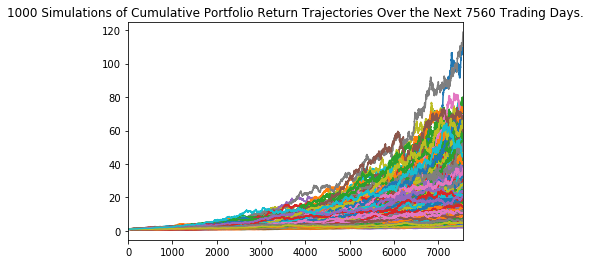

In [101]:
# Plot simulation outcomes
line_plot = MC_thirtyear.plot_simulation()

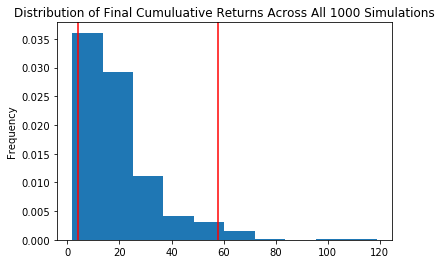

In [102]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyear.plot_distribution()

## Retirement Analysis

In [243]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_30 = MC_thirtyear.summarize_cumulative_return()

# Print summary statistics
print(tbl_30)

count          1000.00
mean             20.08
std              14.65
min               1.45
25%               9.91
50%              16.12
75%              25.87
max              94.11
95% CI Lower      4.26
95% CI Upper     59.24
Name: 7560, dtype: float64


## Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a $20,000 initial investment

In [244]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000

ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $22098.48 and $121678.57


## Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a 50% increase in the initial investment.

In [245]:
# Set initial investment
initial_investment = 20000 * 1.5

ci_lower = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $33147.72 and $182517.85


## Optional Challenge - Early Retirement

In [246]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [127]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.portfolio_data.head()

AGG                                               \
                            open   high    low  close     volume daily_return   
time                                                                            
2017-04-11 00:00:00-04:00 108.76 108.98 108.75 108.90 2054745.00          nan   
2017-04-12 00:00:00-04:00 108.93 109.20 108.89 109.14 2243678.00         0.00   
2017-04-13 00:00:00-04:00 109.25 109.39 109.13 109.28 2004878.00         0.00   
2017-04-17 00:00:00-04:00 109.30 109.40 109.18 109.22 1432374.00        -0.00   
2017-04-18 00:00:00-04:00 109.41 109.70 109.39 109.67 2200401.00         0.00   

                             SPY                                                
                            open   high    low  close      volume daily_return  
time                                                                            
2017-04-11 00:00:00-04:00    nan    nan    nan    nan         nan          nan  
2017-04-12 00:00:00-04:00 234.74 234.96 233.77 234.10 55338215.00          nan  
2017-04-13 00:00:00-04:00 233.63 234.49 232.54 232.54 63216959.00        -0.01  
2017-04-17 00:00:00-04:00 233.11 234.57 232.88 234.57 46820072.00         0.01  
2017-04-18 00:00:00-04:00 233.71 234.49 233.08 233.86 52786936.00        -0.00

In [247]:
# Plot simulation outcomes
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
1,1.00,1.01,0.98,0.99,1.00,0.99,0.99,1.00,1.00,1.02,...,0.99,1.00,1.00,1.01,0.99,1.00,0.99,1.00,1.01,0.99
2,1.01,1.02,0.98,0.99,1.01,1.00,0.98,1.00,1.01,1.01,...,0.98,1.00,0.99,1.00,1.00,1.00,0.98,1.00,1.01,0.99
3,1.01,1.02,0.98,1.00,1.00,1.00,0.97,1.00,1.00,0.99,...,0.99,1.01,0.99,1.00,0.99,1.01,0.98,1.00,1.00,0.99
4,1.01,1.02,0.96,0.99,1.00,1.01,0.97,1.00,1.00,1.00,...,0.99,1.01,1.00,1.00,0.99,1.01,0.99,1.01,1.00,1.00
5,1.01,1.02,0.96,0.99,1.00,1.01,0.97,0.99,1.00,1.01,...,0.99,1.01,1.01,1.00,0.99,1.00,0.97,1.00,0.99,0.98
6,1.01,1.02,0.95,0.98,1.00,1.01,0.97,1.00,0.99,1.01,...,0.98,1.01,1.00,1.00,1.00,1.00,0.98,1.00,0.99,0.99
7,1.01,1.01,0.96,0.99,1.00,1.00,0.97,0.98,0.97,1.02,...,1.00,1.00,1.00,1.02,1.01,1.00,0.99,1.00,1.00,0.99
8,1.02,1.02,0.94,0.97,1.00,1.00,0.97,0.97,0.97,1.01,...,0.99,1.01,0.98,1.01,1.02,0.99,1.00,1.00,1.00,0.97
9,1.01,1.02,0.94,0.98,1.00,1.01,0.98,0.97,0.97,1.01,...,0.98,1.02,0.98,1.02,1.02,0.99,1.00,1.01,1.01,0.97


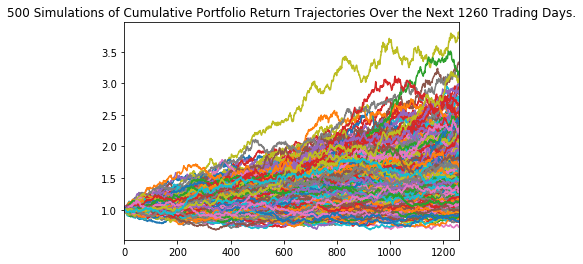

In [248]:
# Plot probability distribution and confidence intervals
line_plot5 = MC_fiveyear.plot_simulation()

In [249]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_5 = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl_5)

count          500.00
mean             1.67
std              0.48
min              0.73
25%              1.32
50%              1.60
75%              1.93
max              3.79
95% CI Lower     0.95
95% CI Upper     2.75
Name: 1260, dtype: float64


In [250]:
# Set initial investment
initial_investment = 60,000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl[8]*60000,2)
ci_upper_five = round(tbl[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $60,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60,000 in the portfolio over the next 5 years will end within in the range of $66295.43 and $365035.71


#  Ten Years Retirement Option

In [251]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [252]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.portfolio_data.head()

AGG                                               \
                            open   high    low  close     volume daily_return   
time                                                                            
2017-04-11 00:00:00-04:00 108.76 108.98 108.75 108.90 2054745.00          nan   
2017-04-12 00:00:00-04:00 108.93 109.20 108.89 109.14 2243678.00         0.00   
2017-04-13 00:00:00-04:00 109.25 109.39 109.13 109.28 2004878.00         0.00   
2017-04-17 00:00:00-04:00 109.30 109.40 109.18 109.22 1432374.00        -0.00   
2017-04-18 00:00:00-04:00 109.41 109.70 109.39 109.67 2200401.00         0.00   

                             SPY                                                
                            open   high    low  close      volume daily_return  
time                                                                            
2017-04-11 00:00:00-04:00    nan    nan    nan    nan         nan          nan  
2017-04-12 00:00:00-04:00 234.74 234.96 233.77 234.10 55338215.00          nan  
2017-04-13 00:00:00-04:00 233.63 234.49 232.54 232.54 63216959.00        -0.01  
2017-04-17 00:00:00-04:00 233.11 234.57 232.88 234.57 46820072.00         0.01  
2017-04-18 00:00:00-04:00 233.71 234.49 233.08 233.86 52786936.00        -0.00

In [253]:
# Plot simulation outcomes
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
1,1.00,0.99,1.00,1.00,0.98,1.00,0.99,1.00,1.00,0.99,...,1.00,1.00,1.00,1.01,1.01,0.99,1.01,1.00,1.00,0.99
2,1.00,0.99,1.01,0.99,0.99,1.01,0.99,1.01,1.01,1.01,...,1.00,0.99,1.00,1.02,1.01,0.99,1.02,1.01,0.99,1.01
3,0.99,0.99,0.99,1.00,1.00,1.00,0.98,1.03,1.02,1.01,...,1.00,0.98,1.00,1.02,0.99,0.99,1.02,1.01,0.99,0.98
4,0.99,0.98,0.99,1.00,1.00,1.01,0.99,1.02,1.01,1.03,...,0.99,0.98,1.00,1.02,0.99,1.00,1.02,1.01,0.99,0.99
5,0.98,0.99,0.99,1.00,0.99,1.01,0.99,1.02,1.02,1.04,...,0.98,0.98,1.00,1.02,0.99,0.99,1.01,1.01,0.99,0.98
6,0.98,0.99,0.98,0.99,0.99,0.99,1.00,1.01,1.02,1.04,...,0.99,0.98,0.99,1.03,0.99,1.00,1.01,1.01,0.99,0.99
7,0.98,1.00,0.99,0.99,1.00,0.99,1.00,1.01,1.01,1.03,...,0.98,0.97,1.00,1.03,1.00,0.99,1.00,1.01,1.00,1.00
8,0.99,1.01,1.00,0.99,1.00,0.99,1.00,1.02,1.01,1.04,...,0.98,0.97,1.02,1.03,1.00,0.99,1.01,1.01,1.01,1.01
9,1.00,1.03,1.00,0.99,0.99,1.00,1.01,1.02,1.01,1.03,...,0.99,0.97,1.02,1.02,1.01,1.00,1.01,1.01,1.01,1.02


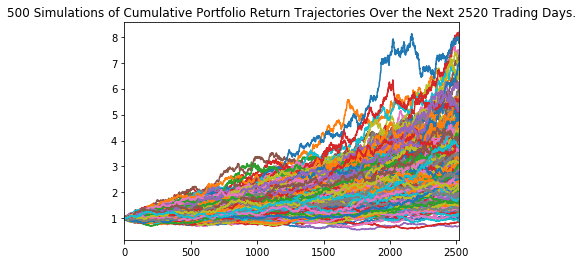

In [254]:
# Plot simulation outcomes
line_plot10 = MC_tenyear.plot_simulation()

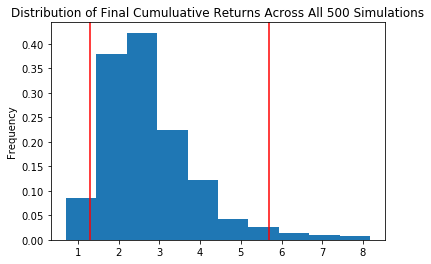

In [255]:
# Plot probability distribution and confidence intervals
dist_plot10 = MC_tenyear.plot_distribution()

In [256]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl10 = MC_tenyear.summarize_cumulative_return()

# Print summary statistics
print(tbl10)

count          500.00
mean             2.76
std              1.16
min              0.70
25%              1.97
50%              2.49
75%              3.34
max              8.17
95% CI Lower     1.30
95% CI Upper     5.68
Name: 2520, dtype: float64


In [257]:
# Set initial investment
initial_investment = 60,000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl[8]*60000,2)
ci_upper_ten = round(tbl[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $60,000 in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60,000 in the portfolio over the next 10 years will end within in the range of $66295.43 and $365035.71
